# Analyzing Lava Flow Velocity with Python
#### Jasper Baur

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import fsspec

import os
from time import time
import warnings
import glob

import skimage ##
import skimage.io as io
import skimage.viewer


import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
%matplotlib inline  
import matplotlib as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure


import IPython ## 
from IPython.display import Video
from IPython.display import Image
from IPython.display import display
from IPython.core.display import HTML


from matplotlib import animation
import PIL 
from PIL import Image




import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
%matplotlib inline  
from IPython import display
display.set_matplotlib_formats('retina')

!pip install fsspec==0.8.4

!pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

!pip install paramiko
import gdrivefs

  Cloning git://github.com/tjcrone/gdrivefs.git (to revision 540a55fae06cbed4f7d9f8d540ac29fcb640c38a) to /tmp/pip-req-build-qt552p9n
  Created wheel for gdrivefs: filename=gdrivefs-0+untagged.18.g540a55f-py3-none-any.whl size=7302 sha256=2f271b13c6ccaf4afe2dbb0720c3ca3aa10ae5bd07be23794c6c9df866867deb
  Stored in directory: /home/jovyan/.cache/pip/wheels/15/4c/f1/4e7c595331abdbc521e37b85bfe0bac4d9ade7a651260cb97f
Successfully built gdrivefs


In [14]:
IPython.__version__

'7.18.1'

### Raw Video Data example

In [2]:
#https://drive.google.com/drive/u/3/folders/1oVIuvti11dBUmHZYhcskmi8HZL38j-q3
gdfid = '1oVIuvti11dBUmHZYhcskmi8HZL38j-q3'

In [3]:
gdfs = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid, token ='cache')

In [17]:
files = gdfs.ls('/')
files[2]
of = gdfs.open(files[2])
files[2]


'Site6_4Sec_Trim.mp4'

In [14]:
Video(of, embed=True, width=900, height=600)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not GoogleDriveFile

In [19]:
from IPython.display import HTML

HTML("""
    <video alt="Site6_4Sec_Trim" controls>
        <source src="https://drive.google.com/drive/u/3/folders/1oVIuvti11dBUmHZYhcskmi8HZL38j-q3" type="video/mp4">
    </video>
""")

In [12]:
#Image(url= "https://static.wixstatic.com/media/066c76_50af7af1a5a94f0aa3cb271b6184fb5f~mv2.jpg/v1/fill/w_770,h_430,al_c,q_80,usm_0.66_1.00_0.01/Site_6_F07_Still_001.jpg",  width=400, height=200)
HTML('<iframe width="760" height="515" src="https://jasperbaur.wixsite.com/research/volcanoes" frameborder="0" allowfullscreen></iframe>')

### Distilled Image Frames

#### Flight 7

In [49]:
frame_F7  = Image(url= "https://static.wixstatic.com/media/066c76_50af7af1a5a94f0aa3cb271b6184fb5f~mv2.jpg/v1/fill/w_770,h_430,al_c,q_80,usm_0.66_1.00_0.01/Site_6_F07_Still_001.jpg",  width=400, height=200)
frame_F7

#### Flight 8

In [50]:
frame_F8  = Image(url= "https://static.wixstatic.com/media/066c76_ddeb0ae6cbee48d8a1836c89d2ba2745~mv2.jpg/v1/fill/w_792,h_440,al_c,q_80,usm_0.66_1.00_0.01/Site_6_F08_Still_001.jpg",  width=400, height=200)
frame_F8

#### Flight 9

In [51]:
frame_F9  = Image(url= "https://static.wixstatic.com/media/066c76_046d0e1295eb447eb9773ce2d12cefc7~mv2.jpg/v1/fill/w_774,h_430,al_c,q_80,usm_0.66_1.00_0.01/Site_6_F09_Still_001.jpg",  width=400, height=200)
frame_F9

#### Flight 10

In [53]:
frame_F10  = Image(url= "https://static.wixstatic.com/media/066c76_a8ac6473ace44899a98d15da641c0f71~mv2.jpg/v1/fill/w_790,h_430,al_c,q_80,usm_0.66_1.00_0.01/Site_6_F10_Still_001.jpg",  width=400, height=200)
frame_F10

Text(0.5, 1.0, 'Flight 10')

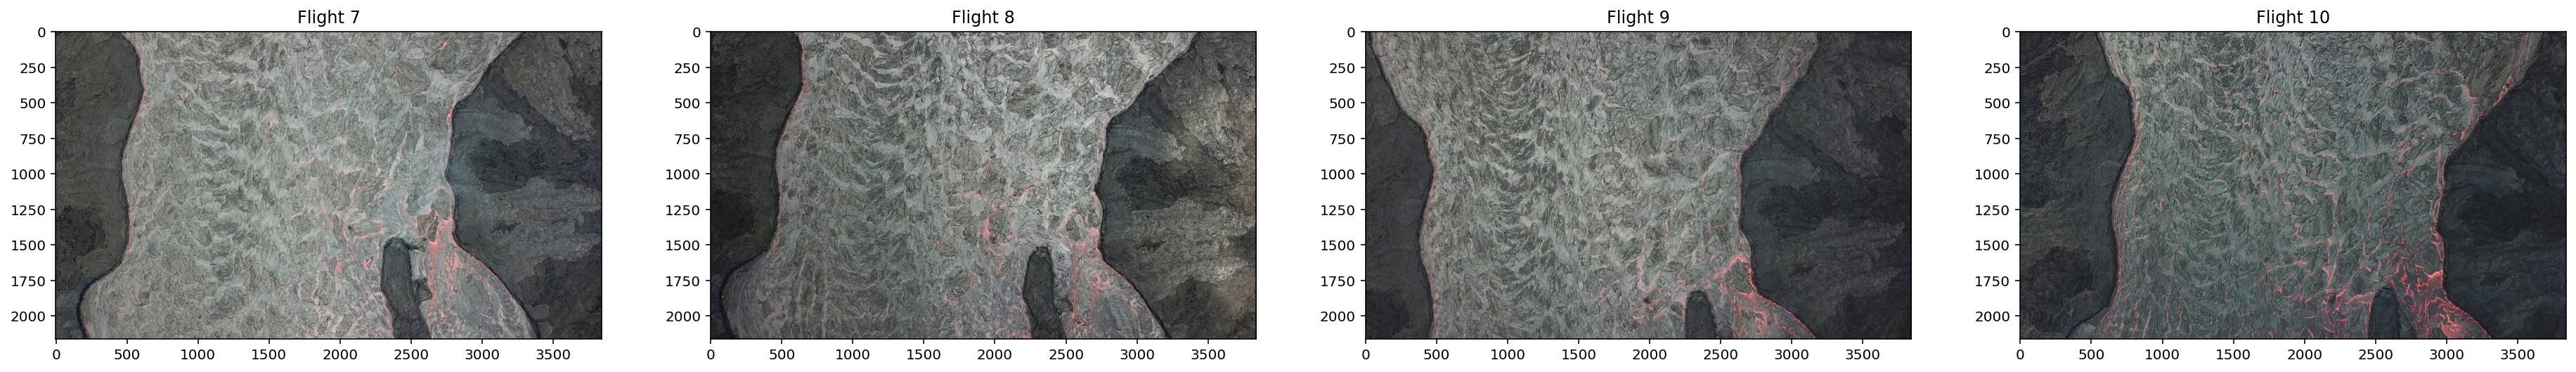

In [76]:
f_dir = '/Users/Jasper/Volc_Research/OpenPIV/Frames/0726/'
frame_F7  = mpimg.imread(f_dir + 'Flight7_1308_Vpt4-5-6-5PostTypeA/DJI_0004_20180726_1308-Vpt6postTypeA_Trim_Frames/DJI_0004_20180726_1308-Vpt6postTypeA_Trim.MOV_003.jpg')
frame_F8  = mpimg.imread( f_dir + 'Flight8_1335_Vpt4-5-6-5PostTypeA/DJI_0003_20180726_1335-Vpt6postTypeA_Frames/DJI_0003_20180726_1335-Vpt6postTypeA.MOV_002.jpg')
frame_F9  = mpimg.imread(f_dir + 'Flight9_1405_Vpt4-5-6-5PostTypeA/DJI_0003_20180726_1405-Vpt6postTypeA_Frames/DJI_0003_20180726_1405-Vpt6postTypeA.MOV_002.jpg')
frame_F10  = mpimg.imread('/Users/Jasper/Volc_Research/OpenPIV/F10_Clip/f10_CLIP/DJI_0003_20180726_1440-Vpt6postTypeA-Copy1.MOV_117.jpg')


fig,ax = plt.subplots(1,4,figsize=(32,12))
ax[0].imshow(frame_F7)
ax[0].set_title('Flight 7')
ax[1].imshow(frame_F8)
ax[1].set_title('Flight 8')
ax[2].imshow(frame_F9)
ax[2].set_title('Flight 9')
ax[3].imshow(frame_F10)
ax[3].set_title('Flight 10')


## Loading Multiple files into one xarray and cleaning the data
Site 6: Flights 7, 8, 9, 10

#### Flight 7

In [4]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F07 0-20
#https://drive.google.com/drive/u/3/folders/1tuAQkCOJrFwhztj36-0eIHp-Pc9l8_36
gdfid1 = '1tuAQkCOJrFwhztj36-0eIHp-Pc9l8_36'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='browser')
files1 = gdfs1.ls('')

#Google drive link for F07 21-120
#https://drive.google.com/drive/u/3/folders/18vQjH7MszSd_Ysh0vMi0iGDE8gw-dJ6D
gdfid2 = '18vQjH7MszSd_Ysh0vMi0iGDE8gw-dJ6D'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files07 = files1 + files2

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=1fTh5hkDK04NhScTJxE5UvYOOD85j0&prompt=consent&access_type=offline


Enter the authorization code:  4/1AY0e-g47s8F52ZjN1Bnrgzz_OhSXS8TErrgSrcciGPmdfr00Y9fqp_sE0KU


In [5]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files07_1 + files07_2  : these are the directory with the CSV files

F07 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F07.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F07.append(dfi)

In [6]:
#Convert it to dataArray and merge coordiantes along time dimension
df07 = xr.concat(F07, dim = 'time')
df07 =df07.sortby('time', ascending=True)
df07

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * time     (time) object '01' '02' '03' '04' '05' ... '20' '20' '20' '20' '20'
Data variables:
    u        (time, x, y) float64 -0.8317 -0.5578 -0.7413 ... 1.334 1.238 1.072
    v        (time, x, y) float64 -0.6028 -0.788 -0.5958 ... 0.1429 0.1324
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### Flight 8

In [7]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F08 0-20
#https://drive.google.com/drive/u/3/folders/1TF0KZIQaSnXhf38jxtKGdZSZ9NF-9WIE
gdfid1 = '1TF0KZIQaSnXhf38jxtKGdZSZ9NF-9WIE'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='cache')
files1 = gdfs1.ls('')

#Google drive link for F08 21-120
#https://drive.google.com/drive/u/3/folders/1q9EgvnGwpZvJFGbBe6yuM1afLoh1n633
gdfid2 = '1q9EgvnGwpZvJFGbBe6yuM1afLoh1n633'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files08 = files1 + files2

In [8]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files1 + files2 : these are the directory with the CSV files

F08 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F08.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F08.append(dfi)

In [9]:
#Convert it to dataArray and merge coordiantes along time dimension
df08 = xr.concat(F08, dim = 'time')
df08 =df08.sortby('time', ascending=True)
df08

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * time     (time) object '01' '02' '03' '04' '05' ... '20' '20' '20' '20' '20'
Data variables:
    u        (time, x, y) float64 -1.224 -1.337 -1.403 ... -1.918 -1.949 -1.997
    v        (time, x, y) float64 1.407 1.304 1.206 ... -0.0355 -0.0728 -0.0965
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### Flight 9

In [10]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F09 0-20
#https://drive.google.com/drive/u/3/folders/1B0trTgJ1KlnV24w8PRBixb6GbE7cBI_s
gdfid1 = '1B0trTgJ1KlnV24w8PRBixb6GbE7cBI_s'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='cache')
files1 = gdfs1.ls('')

#Google drive link for F09 21-120
#https://drive.google.com/drive/u/3/folders/1veNpNBtfcMws9455MkvQyhip4n_Wdn6B
gdfid2 = '1veNpNBtfcMws9455MkvQyhip4n_Wdn6B'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files08 = files1 + files2

In [11]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files1 + files2 : these are the directory with the CSV files

F09 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F09.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F09.append(dfi)

In [12]:
#Convert it to dataArray and merge coordiantes along time dimension
df09 = xr.concat(F09, dim = 'time')
df09 =df09.sortby('time', ascending=True)
df09

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * time     (time) object '01' '02' '03' '04' '05' ... '20' '20' '20' '20' '20'
Data variables:
    u        (time, x, y) float64 1.973 1.964 1.901 ... -1.066 -0.6302 -0.7217
    v        (time, x, y) float64 0.3399 0.7432 1.216 ... -1.734 -2.212 -2.098
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### Flight 10

In [13]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F10 0-20
#https://drive.google.com/drive/u/3/folders/10AKN5mi2jbbhTd5vgthX3TWjRBDDuBs6
gdfid1 = '10AKN5mi2jbbhTd5vgthX3TWjRBDDuBs6'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='cache')
files1 = gdfs1.ls('')

#Google drive link for F07 21-120
#https://drive.google.com/drive/u/3/folders/1BB-QnJI0FEdswQT9z6X8tYPjSgzx9Q94
gdfid2 = '1BB-QnJI0FEdswQT9z6X8tYPjSgzx9Q94'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files08 = files1 + files2

In [14]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files1 + files2 : these are the directory with the CSV files

F10 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F10.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F10.append(dfi)

In [15]:
#Convert it to dataArray and merge coordiantes along time dimension
df10 = xr.concat(F10, dim = 'time')
df10 =df10.sortby('time', ascending=True)
df10

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * time     (time) object '01' '02' '03' '04' '05' ... '20' '20' '20' '20' '20'
Data variables:
    u        (time, x, y) float64 0.0293 -0.0534 -0.2903 ... -2.015 -2.044
    v        (time, x, y) float64 0.272 0.4125 0.443 0.8632 ... 4.001 4.04 4.062
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

### Comnine all Flights into one Dataset with new dimension (Flight)

In [16]:
Flights = [df07, df08, df09, df10]
dfx = xr.concat(Flights, dim = 'Flight')
dfx =dfx.sortby('Flight', ascending=True)
dfx = dfx.assign_coords(Flight =['F07','F08','F09', 'F10'])
dfx['time'] =np.arange(0,120)
dfx

<xarray.Dataset>
Dimensions:  (Flight: 4, time: 120, x: 119, y: 66)
Coordinates:
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * Flight   (Flight) <U3 'F07' 'F08' 'F09' 'F10'
Data variables:
    u        (Flight, time, x, y) float64 -0.8317 -0.5578 ... -2.015 -2.044
    v        (Flight, time, x, y) float64 -0.6028 -0.788 -0.5958 ... 4.04 4.062
    mask     (Flight, time, x, y) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

### Make Conversions to real world units

In [17]:
AGL = 304.8 #meters
FOV = np.deg2rad(78.8) #degrees
Aspect =  2160/3840   #aspect ratio 16:9

D =   2 * AGL *np.tan(FOV/2) #diagnol of image

A = (D) / np.sqrt(1 + Aspect**2)
B = Aspect * D / np.sqrt(1 + Aspect**2)
print('Image Footprint:',A, 'm x', B, 'm')

PixelX = 3840
PixelY = 2180


GSDx = A/ PixelX
GSDy = B/ PixelY

#GSDx =   .08736              #google earth method .0956      #  first method 0.0192 #m/pix
#GSDy =   .1159              #google earth method .1268      # first method 0.0255  # meters/ pixel


print('Ground Sampling Distance:', 'x:', GSDx, 'y:', GSDy)

Image Footprint: 436.4249645610448 m x 245.4890425655877 m
Ground Sampling Distance: x: 0.11365233452110542 y: 0.11260965255302188


In [18]:
#Velocity Calculation
dfx['u'] = dfx.u *GSDx 
dfx['v'] = dfx.v*-1 * GSDy # the negative is to make the downstream velocity positive

#Spatial Calculation
dfx['x'] = dfx.x*GSDx 
dfx['y'] = dfx.y*GSDy 

## Subtract out drone motion from velocity fields

#### Subtract out v velocity of still region from image

In [19]:
#Each flight
F07 = dfx.sel(Flight= 'F07')
F08 = dfx.sel(Flight= 'F08')
F09 = dfx.sel(Flight= 'F09')
F10 = dfx.sel(Flight= 'F10')

In [20]:
np.sum(np.sqrt(F07.sel(x=slice(380,420), y=slice(50, 237)).v**2))

<xarray.DataArray 'v' ()>
array(8329.39270882)
Coordinates:
    Flight   <U3 'F07'

In [21]:
np.sum(np.sqrt(F07.sel(x=slice(380,420), y=slice(50, 237)).u**2))

<xarray.DataArray 'u' ()>
array(4934.5293518)
Coordinates:
    Flight   <U3 'F07'

## START

#### F07

In [22]:
###########################################################################################
for i in range(120):
    Av = dfx.sel(Flight= 'F07',time= i, x=slice(380,420), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F07', time= i, x=slice(0,25), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F07').v[i] = dfx.sel(Flight='F07').v[i] - Cv

In [23]:
np.sum(np.sqrt(dfx.sel(Flight='F07',x=slice(380,420), y=slice(50, 237)).v**2))

<xarray.DataArray 'v' ()>
array(2560.22459247)
Coordinates:
    Flight   <U3 'F07'

In [24]:
###############################################################################
for i in range(120):
    Au = dfx.sel(Flight= 'F07',time= i, x=slice(380,420), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F07', time= i, x=slice(0,25), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F07').u[i] = dfx.sel(Flight='F07').u[i] - Cu

In [25]:
np.sum(np.sqrt(F07.sel(x=slice(380,420), y=slice(50, 237)).u**2))

<xarray.DataArray 'u' ()>
array(1722.91802762)
Coordinates:
    Flight   <U3 'F07'

#### F08

In [26]:
for i in range(120):
    Av = dfx.sel(Flight= 'F08',time= i, x=slice(380,420), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F08', time= i, x=slice(0,25), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F08').v[i] = dfx.sel(Flight='F08').v[i] - Cv

In [27]:
for i in range(120):
    Au = dfx.sel(Flight= 'F08',time= i, x=slice(380,420), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F08', time= i, x=slice(0,25), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F08').u[i] = dfx.sel(Flight='F08').u[i] - Cu

#### F09

In [28]:
for i in range(120):
    Av = dfx.sel(Flight= 'F09',time= i, x=slice(380,420), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F09', time= i, x=slice(0,25), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F09').v[i] = dfx.sel(Flight='F09').v[i] - Cv

In [29]:
for i in range(120):
    Au = dfx.sel(Flight= 'F09',time= i, x=slice(380,420), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F09', time= i, x=slice(0,25), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F09').u[i] = dfx.sel(Flight='F09').u[i] - Cu

#### F10

In [30]:
for i in range(120):
    Av = dfx.sel(Flight= 'F10',time= i, x=slice(380,420), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F10', time= i, x=slice(0,25), y=slice(50, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F10').v[i] = dfx.sel(Flight='F10').v[i] - Cv

In [31]:
for i in range(120):
    Au = dfx.sel(Flight= 'F10',time= i, x=slice(380,420), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F10', time= i, x=slice(0,25), y=slice(50, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F10').u[i] = dfx.sel(Flight='F10').u[i] - Cu

## STOP

### Add Total Velocity (s) to dataArray

In [32]:
s = np.sqrt(dfx.u**2+dfx.v**2)
dfx['s']= s
dfx

<xarray.Dataset>
Dimensions:  (Flight: 4, time: 120, x: 119, y: 66)
Coordinates:
  * y        (y) float64 3.604 7.207 10.81 14.41 ... 227.0 230.6 234.2 237.8
  * x        (x) float64 3.637 7.274 10.91 14.55 ... 421.9 425.5 429.2 432.8
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * Flight   (Flight) <U3 'F07' 'F08' 'F09' 'F10'
Data variables:
    u        (Flight, time, x, y) float64 -0.03656 -0.005431 ... -0.1262 -0.1295
    v        (Flight, time, x, y) float64 0.02105 0.0419 ... 0.01729 0.01486
    mask     (Flight, time, x, y) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    s        (Flight, time, x, y) float64 0.04219 0.04225 ... 0.1274 0.1303

### Correct for Spikes

In [33]:
dfx = dfx.where(dfx.v<5 )
dfx = dfx.where(dfx.u<5 , dfx.u > -5)

### Drop Mask (no information)

In [34]:
dfx = dfx.drop('mask')

### Select By Flights

In [35]:
F07 = dfx.sel(Flight= 'F07')
F08 = dfx.sel(Flight= 'F08')
F09 = dfx.sel(Flight= 'F09')
F10 = dfx.sel(Flight= 'F10')


In [36]:
# just to get array of seconds (not needed, but figure it would be good to hold on to)

#file1 = files[i]
#sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
#time = xr.full_like(dfi.u, sec)
#dfi['time']=sec
#dfi.coords['time']=time

# Visualizing the Data

## Some Plots with time

Text(0, 0.5, 'meters')

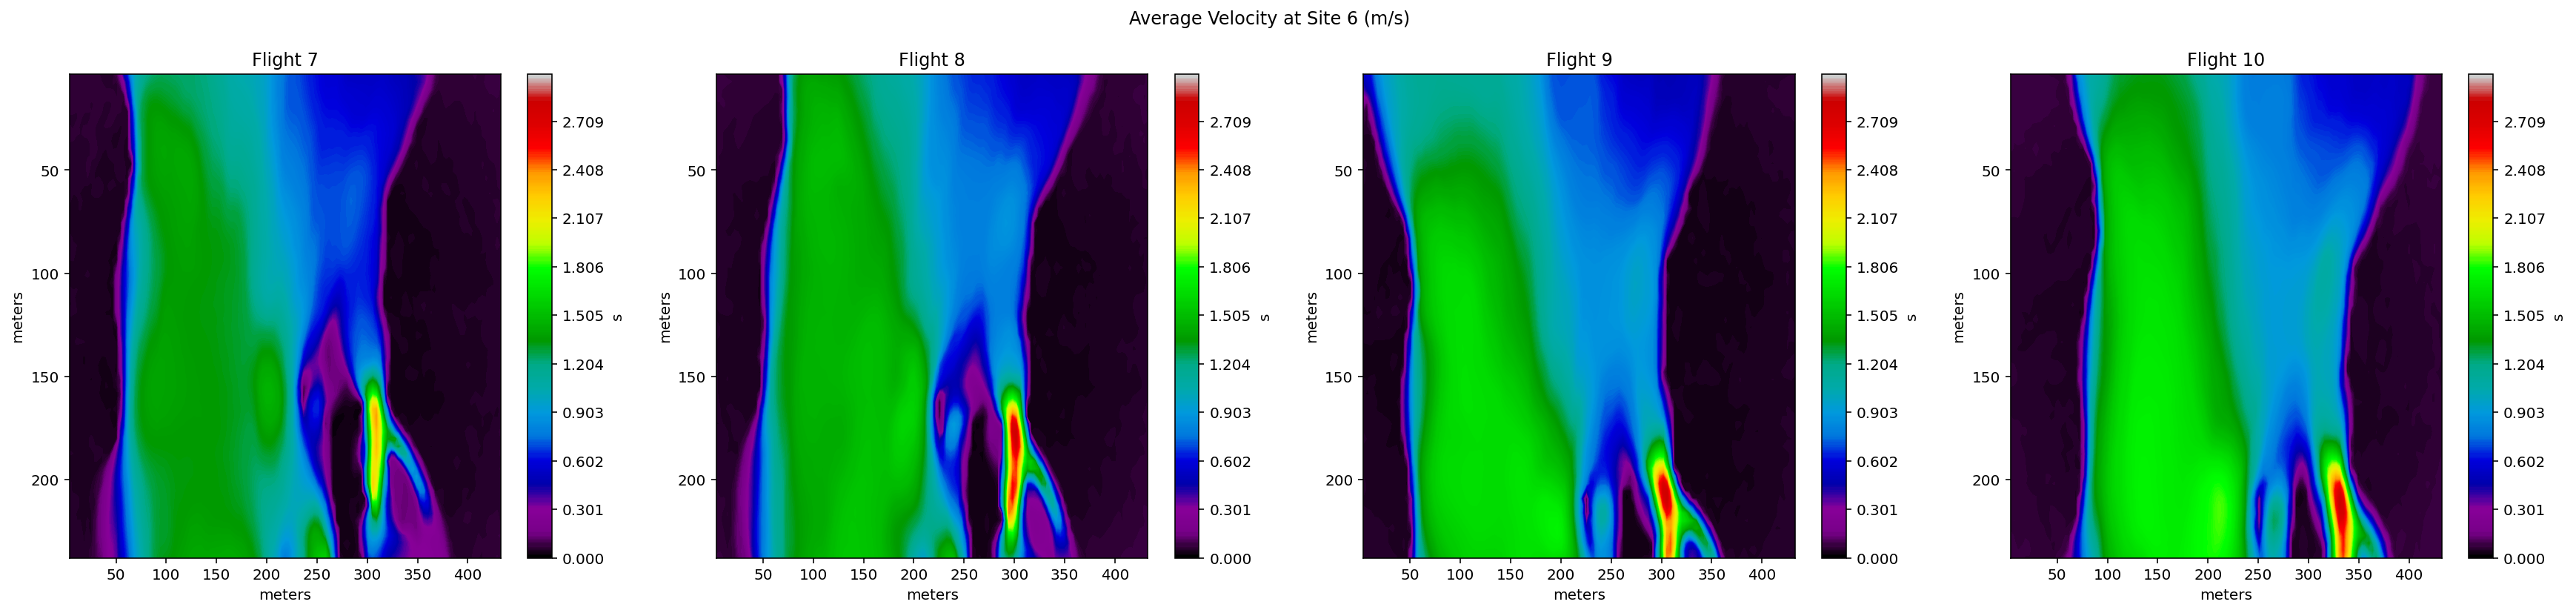

In [39]:

fig, axes = plt.subplots(figsize=(32, 8), ncols=4, )
ax1, ax2, ax3, ax4 =axes

plt.suptitle("Average Velocity at Site 6 (m/s)")

F7_cor_s = F07.s
F7_cor_s.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[0], yincrease=False)
ax1.set_title('Flight 7')
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')
#ax1.set_xticks([0, .5, 1, 1.5, 2, 2.5, 3])


F8_cor_s = F08.s 
F8_cor_s.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[1], yincrease=False)
ax2.set_title('Flight 8')
ax2.set_xlabel('meters')
ax2.set_ylabel('meters')

F9_cor_s = F09.s 
F9_cor_s.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[2], yincrease=False)
#plt.gca().invert_yaxis()
ax3.set_title('Flight 9')
ax3.set_xlabel('meters')
ax3.set_ylabel('meters')

F10_cor_s = F10.s
F10_cor_s.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[3], yincrease=False)
ax4.set_title('Flight 10')
ax4.set_xlabel('meters')
ax4.set_ylabel('meters')


Text(0, 0.5, 'meters')

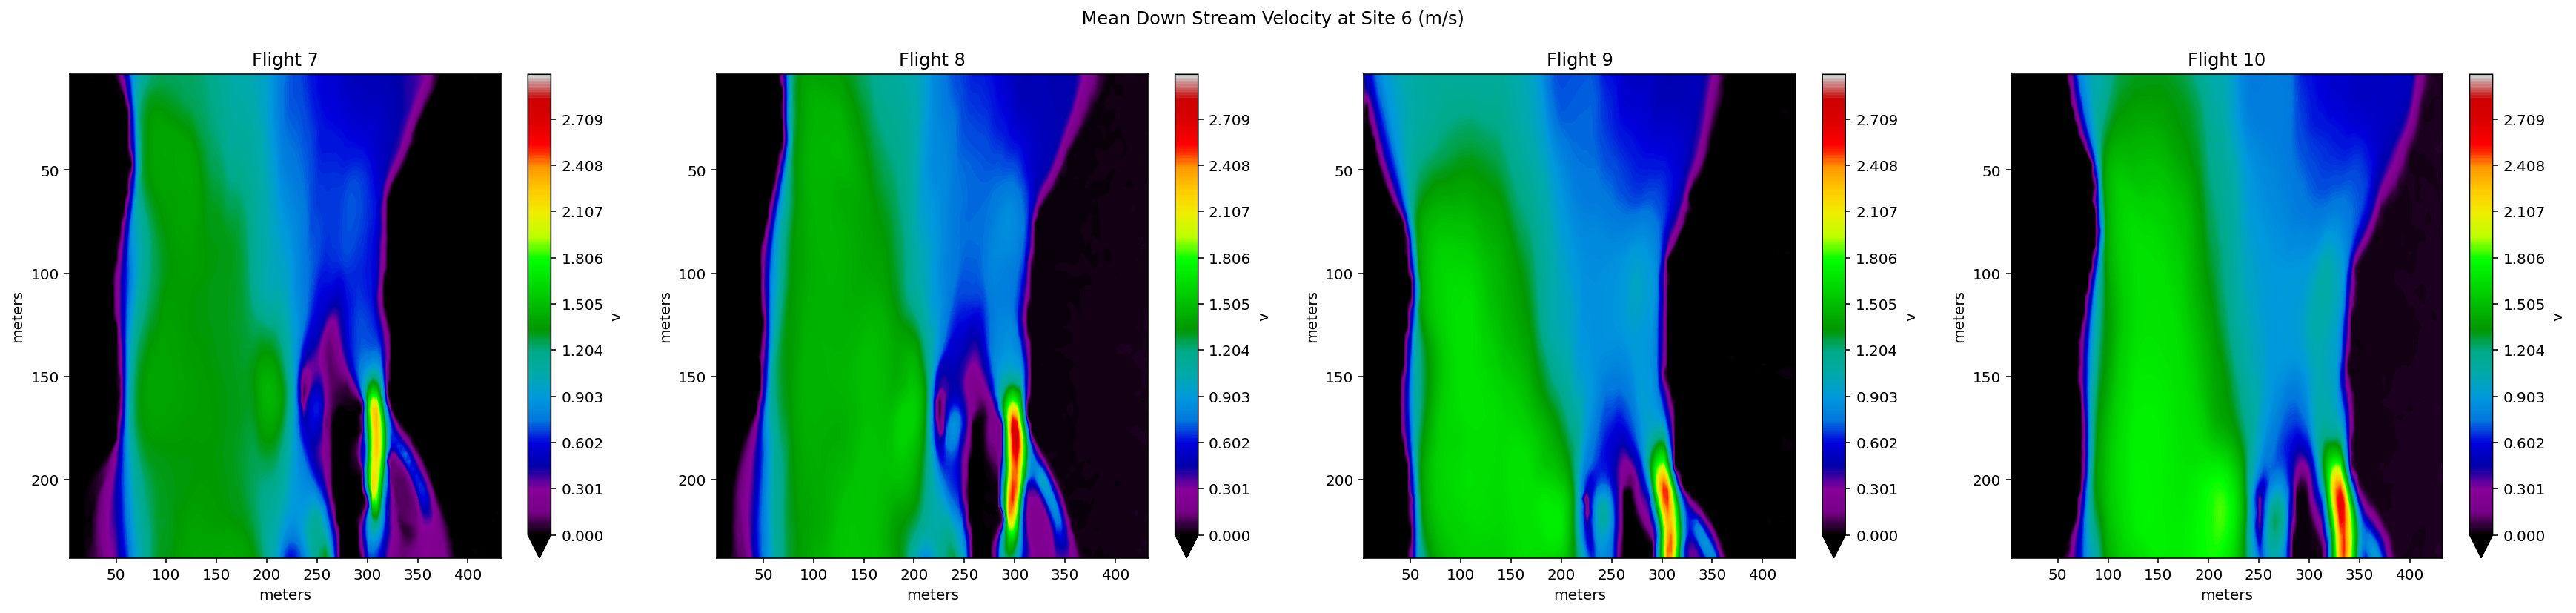

In [40]:
fig, axes = plt.subplots(figsize=(32, 8), ncols=4, )
ax1, ax2, ax3, ax4 =axes

plt.suptitle(" Mean Down Stream Velocity at Site 6 (m/s)")


F07.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[0], yincrease=False)
ax1.set_title('Flight 7')
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')

F08.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[1], yincrease=False)
ax2.set_title('Flight 8')
ax2.set_xlabel('meters')
ax2.set_ylabel('meters')

F09.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[2], yincrease=False)
ax3.set_title('Flight 9')
ax3.set_xlabel('meters')
ax3.set_ylabel('meters')

F10.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=axes[3], yincrease=False)
ax4.set_title('Flight 10')
ax4.set_xlabel('meters')
ax4.set_ylabel('meters')


Text(0, 0.5, 'meters')

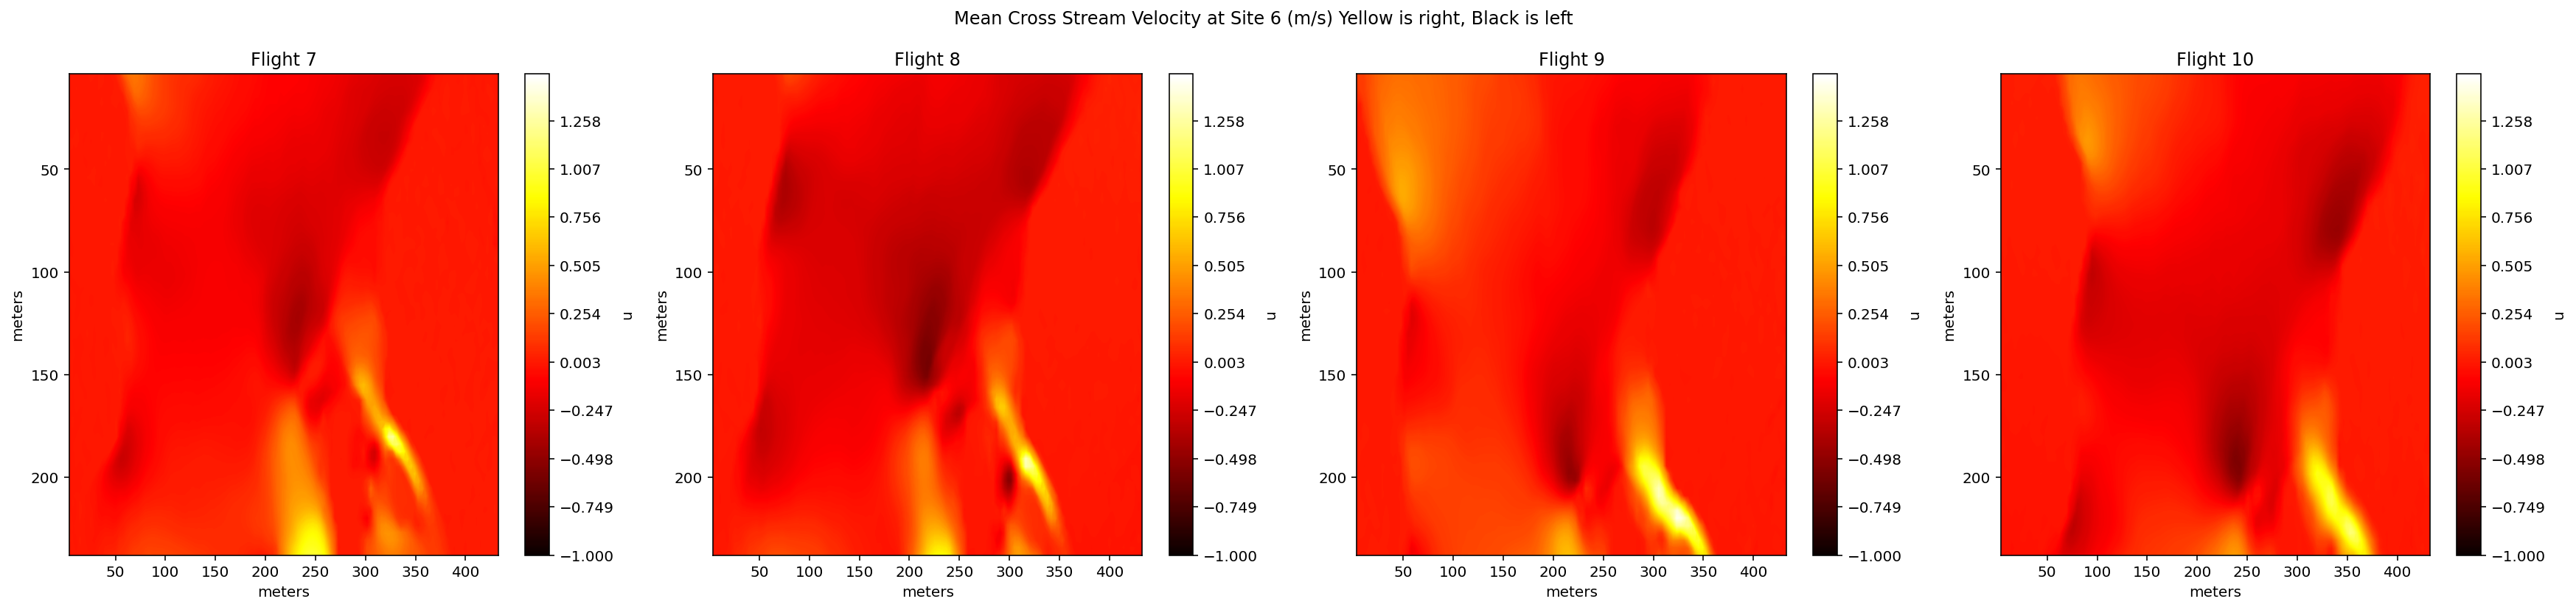

In [41]:
fig, axes = plt.subplots(figsize=(32, 8), ncols=4, )
ax1, ax2, ax3, ax4 =axes

plt.suptitle("Mean Cross Stream Velocity at Site 6 (m/s) Yellow is right, Black is left")


F07.u.mean(dim='time').transpose().plot.contourf(levels=300, vmin= -1, vmax=1.5, cmap=cm.hot, ax=axes[0], yincrease=False)
ax1.set_title('Flight 7')
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')

F08.u.mean(dim='time').transpose().plot.contourf(levels=300, vmin= -1, vmax=1.5, cmap=cm.hot, ax=axes[1], yincrease=False)
ax2.set_title('Flight 8')
ax2.set_xlabel('meters')
ax2.set_ylabel('meters')

F09.u.mean(dim='time').transpose().plot.contourf(levels=300, vmin= -1, vmax=1.5, cmap=cm.hot, ax=axes[2], yincrease=False)
ax3.set_title('Flight 9')
ax3.set_xlabel('meters')
ax3.set_ylabel('meters')

F10.u.mean(dim='time').transpose().plot.contourf(levels=300, vmin= -1, vmax=1.5, cmap=cm.hot, ax=axes[3], yincrease=False)
ax4.set_title('Flight 10')
ax4.set_xlabel('meters')
ax4.set_ylabel('meters')


NameError: name 'F07' is not defined

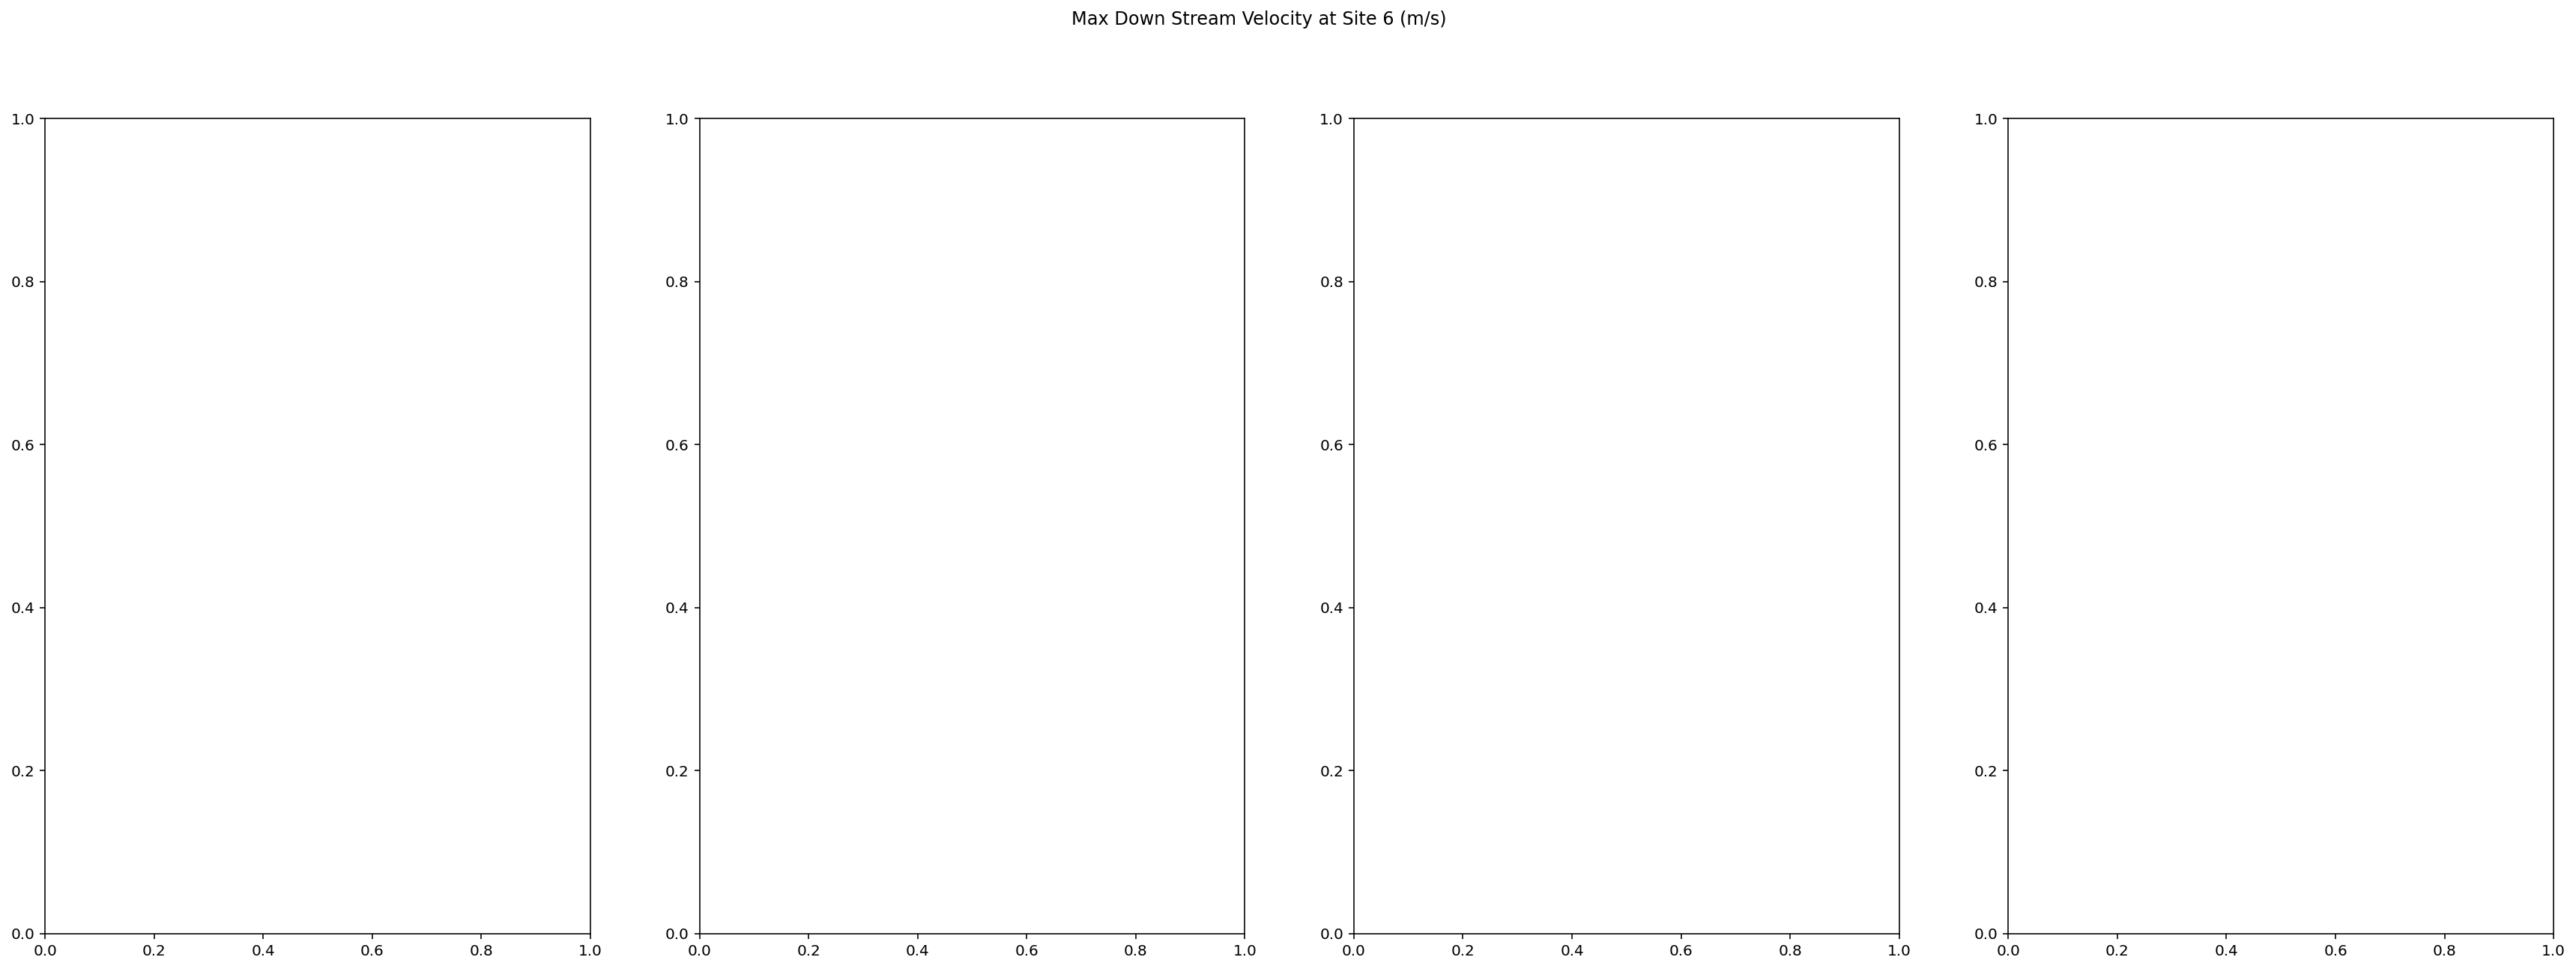

In [19]:
fig, axes = plt.subplots(figsize=(30, 10), ncols=4, )
ax1, ax2, ax3, ax4 =axes


plt.suptitle("Max Down Stream Velocity at Site 6 (m/s)")

# Due to drone motion, positively interfering with down stream velocity, we need to make a corrections
Cor_F07 = F07.v.max(dim='time') -.1
Cor_F07.transpose().plot.contourf(levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, ax=axes[0], yincrease=False)
ax1.set_title('Flight 7')
ax1.set_xlabel('meters')
ax1.set_ylabel('meters')

Cor_F08 = F08.v.max(dim='time') -.1
Cor_F08.transpose().plot.contourf(levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, ax=axes[1], yincrease=False)
ax2.set_title('Flight 8')
ax2.set_xlabel('meters')
ax2.set_ylabel('meters')

Cor_F09 = F09.v.max(dim='time') -.1
Cor_F09.transpose().plot.contourf(levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, ax=axes[2], yincrease=False)
ax3.set_title('Flight 9')
ax3.set_xlabel('meters')
ax3.set_ylabel('meters')

Cor_F10 = F10.v.max(dim='time') -.1
Cor_F10.transpose().plot.contourf(levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, ax=axes[3], yincrease=False)
ax4.set_title('Flight 10')
ax4.set_xlabel('meters')
ax4.set_ylabel('meters')



In [117]:
#load xarray with video, images, velocity fields,
#temperatue + velocity related

#cross sections -  P colormesh in time
#speed as a function of width - look at tiny branch + compare that to larger one!
#animations -xarray
#spectral changes - fourier (wavelength), power spectral density, spectrograms, look at singe pixel

Text(0.5, 1.0, 'Velocity Throughout time of a pixel in the center of the stream ')

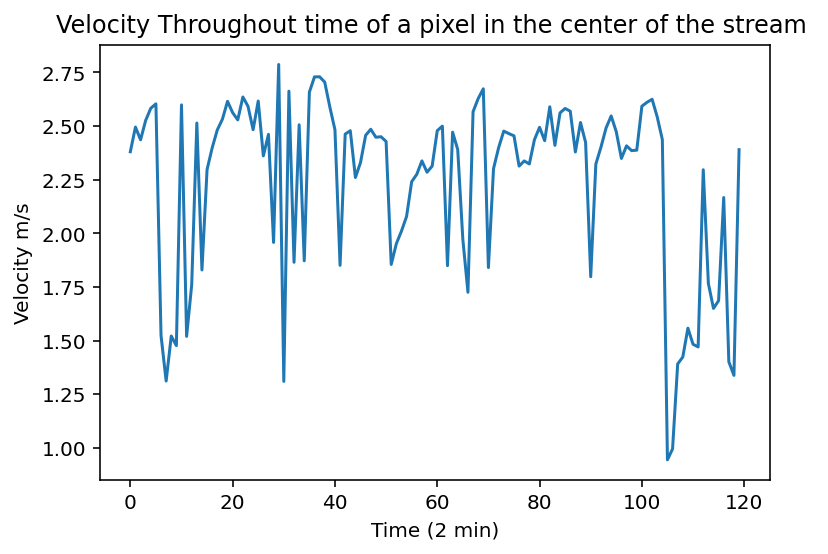

In [43]:
Small = F07.v.sel(x=310, y=165, method='nearest')
plt.plot(F07.time, Small)
plt.ylabel('Velocity m/s')
plt.xlabel('Time (2 min)')
plt.title("Velocity Throughout time of a pixel in the center of the stream ")


Text(0, 0.5, 'meters')

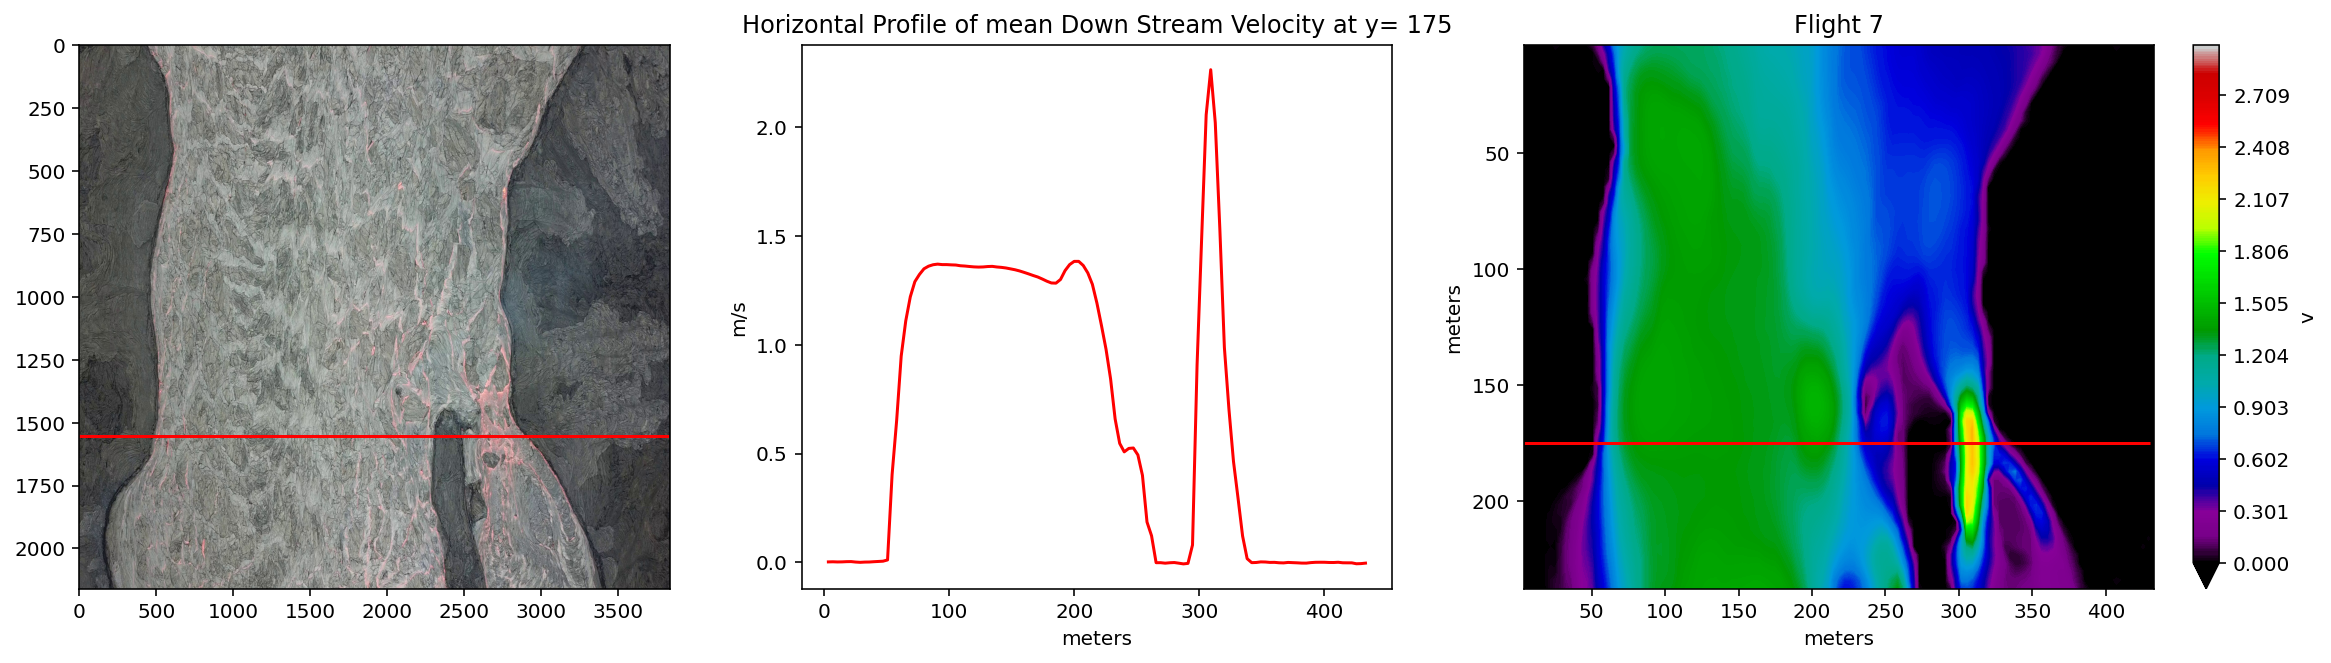

In [119]:
frame_F07  = mpimg.imread('/Users/Jasper/Volc_Research/OpenPIV/Frames/0726/Flight7_1308_Vpt4-5-6-5PostTypeA/DJI_0004_20180726_1308-Vpt6postTypeA_Trim_Frames/DJI_0004_20180726_1308-Vpt6postTypeA_Trim.MOV_018.jpg')
Cross = F07.v.mean(dim='time').sel(y=175, method='nearest')

fig,ax = plt.subplots(1,3,figsize=(20,5), gridspec_kw={'width_ratios': [3, 3, 4]})
ax[0].imshow(frame_F07, aspect='auto')
ax[0].hlines(1554, 0, 3830, colors='red')



Cross.plot(ax=ax[1], color='red')
ax[1].set_title('Horizontal Profile of mean Down Stream Velocity at y= 175')
ax[1].set_ylabel('m/s')
ax[1].set_xlabel('meters')


F07.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=ax[2], yincrease=False)
ax[2].set_title('Flight 7')
ax[2].hlines(175, 4, 430, colors='red')
ax[2].set_xlabel('meters')
ax[2].set_ylabel('meters')

Text(0, 0.5, 'meters')

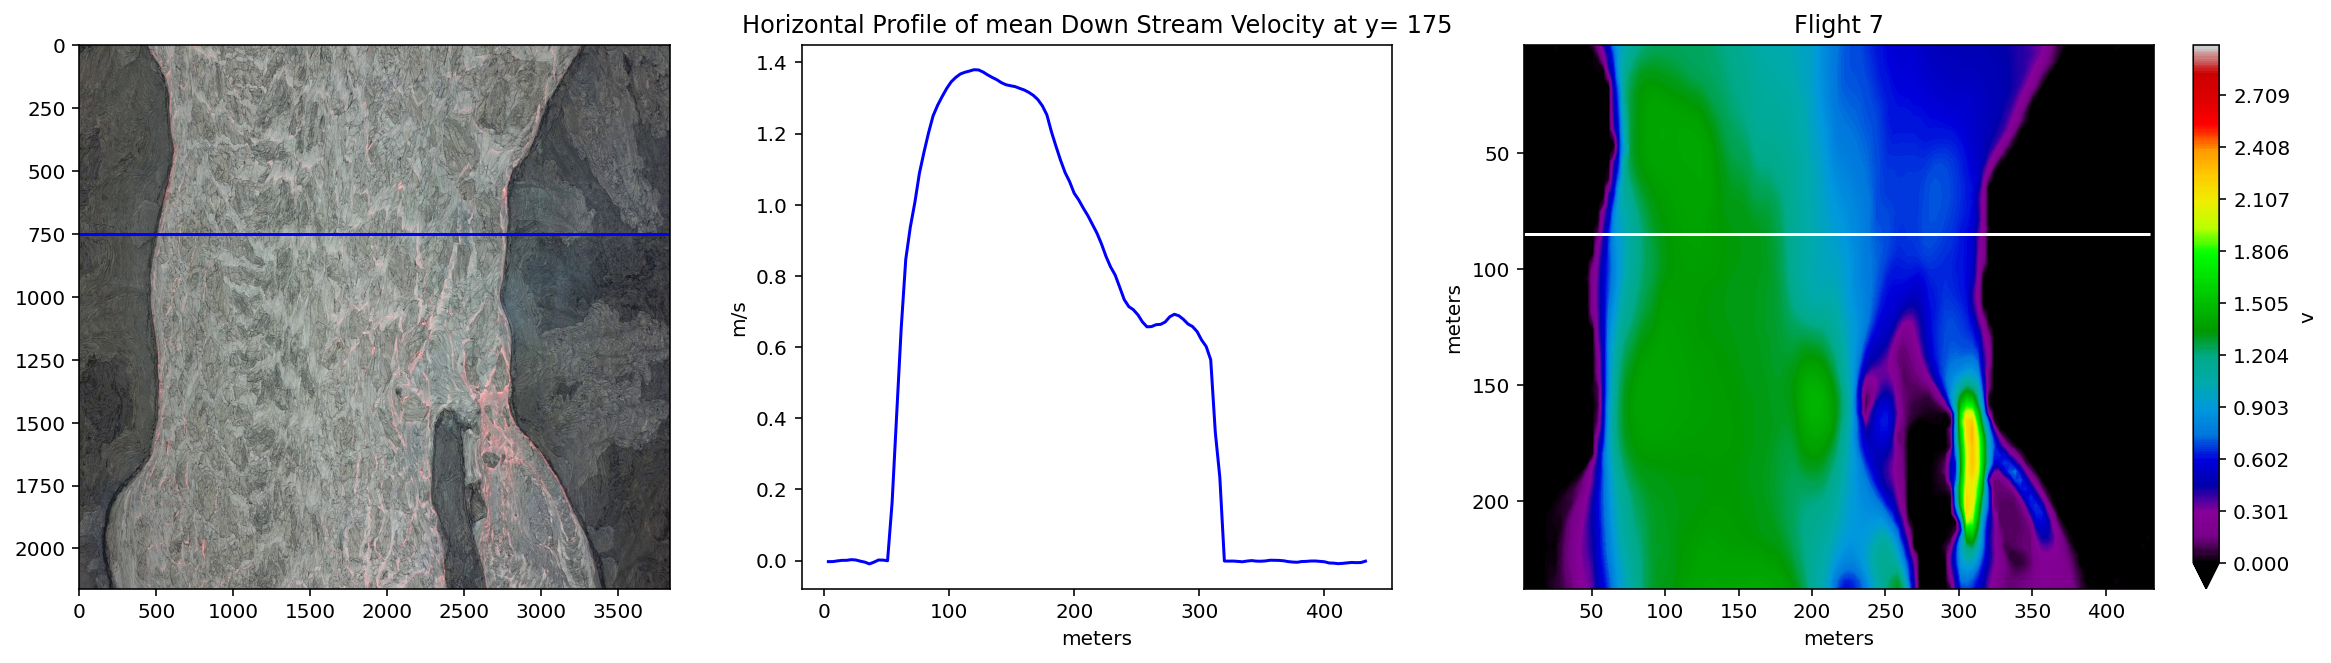

In [120]:
frame_F07  = mpimg.imread('/Users/Jasper/Volc_Research/OpenPIV/Frames/0726/Flight7_1308_Vpt4-5-6-5PostTypeA/DJI_0004_20180726_1308-Vpt6postTypeA_Trim_Frames/DJI_0004_20180726_1308-Vpt6postTypeA_Trim.MOV_018.jpg')
Cross = F07.v.mean(dim='time').sel(y=85, method='nearest')
fig,ax = plt.subplots(1,3,figsize=(20,5), gridspec_kw={'width_ratios': [3, 3, 4]})
ax[0].imshow(frame_F07, aspect='auto')
ax[0].hlines(750, 0, 3830, colors='blue')



Cross.plot(ax=ax[1], color='blue')
ax[1].set_title('Horizontal Profile of mean Down Stream Velocity at y= 175')
ax[1].set_ylabel('m/s')
ax[1].set_xlabel('meters')


F07.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, ax=ax[2], yincrease=False)
ax[2].set_title('Flight 7')
ax[2].hlines(85, 4, 430, colors='white')
ax[2].set_xlabel('meters')
ax[2].set_ylabel('meters')


The width at blue line : 229.57771573263295 m


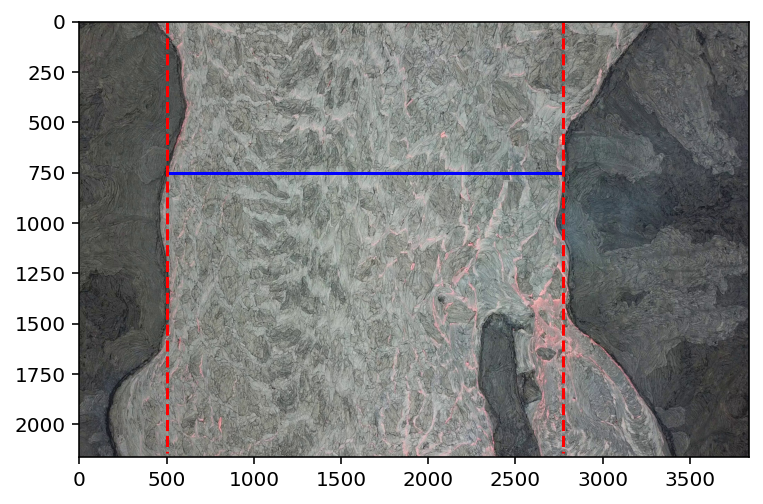

In [121]:
plt.imshow(frame_F07, aspect='auto')
plt.hlines(750, 500, 2770, colors='blue')
plt.vlines(500, 0, 2140, colors='red', linestyles ='dashed')
plt.vlines(2770, 0, 2140, colors='red', linestyles ='dashed')

F07_750_W = (2770-750)*GSDx
print('The width at blue line :' , F07_750_W , 'm')


#F07.v.sel(x=slice(500*GSDx,2770*GSDx), y=750*GSDy)


## Animations
Only need to run these once

In [135]:
#save output jpgs of velocity contour plots

image_name= 'Flight10_VContour_'

time =0
for i in range(len(F10.v)):
    F10.v[i].transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, yincrease=False)
    time = i+1
    plt.title('F10 Down Stream Velocity (m/s), Frame:' + str(time))
    plt.xlabel('meters')
    plt.ylabel('meters')
    plt.savefig(image_name +str(time)+'.jpg')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [137]:
# make a GIF using pillow  (import PIL)

image_frames =[]

dirF07jpg = '/Users/Jasper/Volc_Research/OpenPIV/V_Contours/F10/'

frames = np.arange(1,len(F10['time']))

for k in frames:
    new_frame=PIL.Image.open(dirF07jpg + image_name +  str(k) + '.jpg')
    image_frames.append(new_frame)
    

In [138]:
#save into GIF

image_frames[0].save('F10.gif', format = 'GIF',
                    append_images = image_frames[1: ],
                    save_all = True, duration =300,
                    loop=0)

### Display GIF's

In [14]:
#Flight 7 GIF
Image(url= "https://static.wixstatic.com/media/066c76_03076b2424894229975cf6705199f214~mv2.gif",  width=500, height=500)

In [15]:
#Flight 8 GIF
Image(url= "https://static.wixstatic.com/media/066c76_eb12b760154d4e6d8a669f39e1a4931c~mv2.gif",  width=500, height=500)

In [11]:
#Flight 9 GIF
Image(url= "https://static.wixstatic.com/media/066c76_c3772ec4475b483cbc8cd4d28032da01~mv2.gif",  width=500, height=500)

In [12]:
#Flight 10 GIF
Image(url= "https://static.wixstatic.com/media/066c76_b12d6ea5c72a419abeef1d23b57526c0~mv2.gif",  width=500, height=500)

# Analyzing the Data
### Questions
- What was the average speed of the lava flow
- Over the course of aproximatly 3.5 hours did flow velocity change signifigantly?
- How did the channel width affect flow speeds?

Text(0.5, 1.0, 'Flight 10')

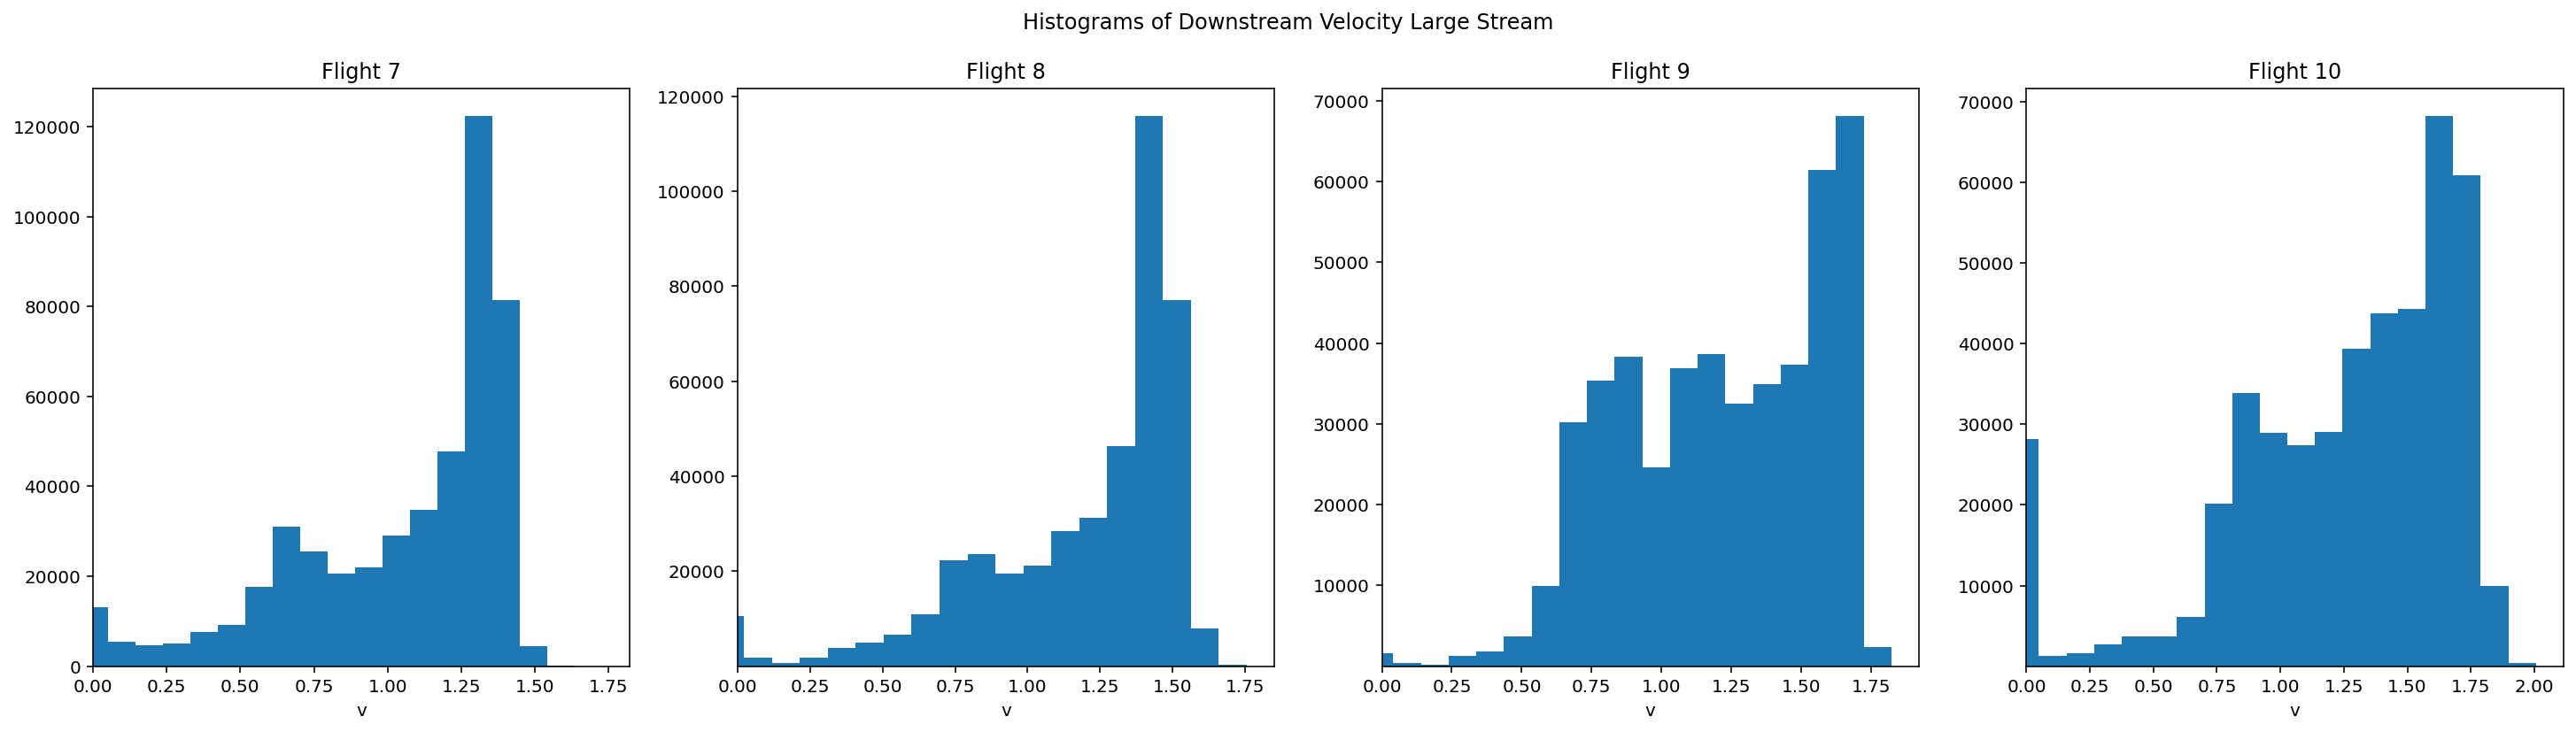

In [143]:
# Which flight recorded the fastest flowing lava
fig, axes = plt.subplots(figsize=(25, 6), ncols=4)
ax1, ax2, ax3, ax4 = axes

plt.suptitle("Histograms of Downstream Velocity Large Stream")

F07.v.sel(x=slice(50,270)).plot.hist(xlim=0, ax=ax1, bins=20  )
ax1.set_title('Flight 7')

F08.v.sel(x=slice(50,250)).plot.hist(xlim=0, ylim=3, ax=ax2, bins=20 )
ax2.set_title('Flight 8')

F09.v.sel(x=slice(50,260)).plot.hist(xlim=-0, ylim=3, ax=ax3, bins=20  )
ax3.set_title('Flight 9')

F10.v.sel(x=slice(60,270)).plot.hist(xlim=0, ylim=3, ax=ax4, bins=20  )
ax4.set_title('Flight 10')





Text(0.5, 1.0, 'Flight 10')

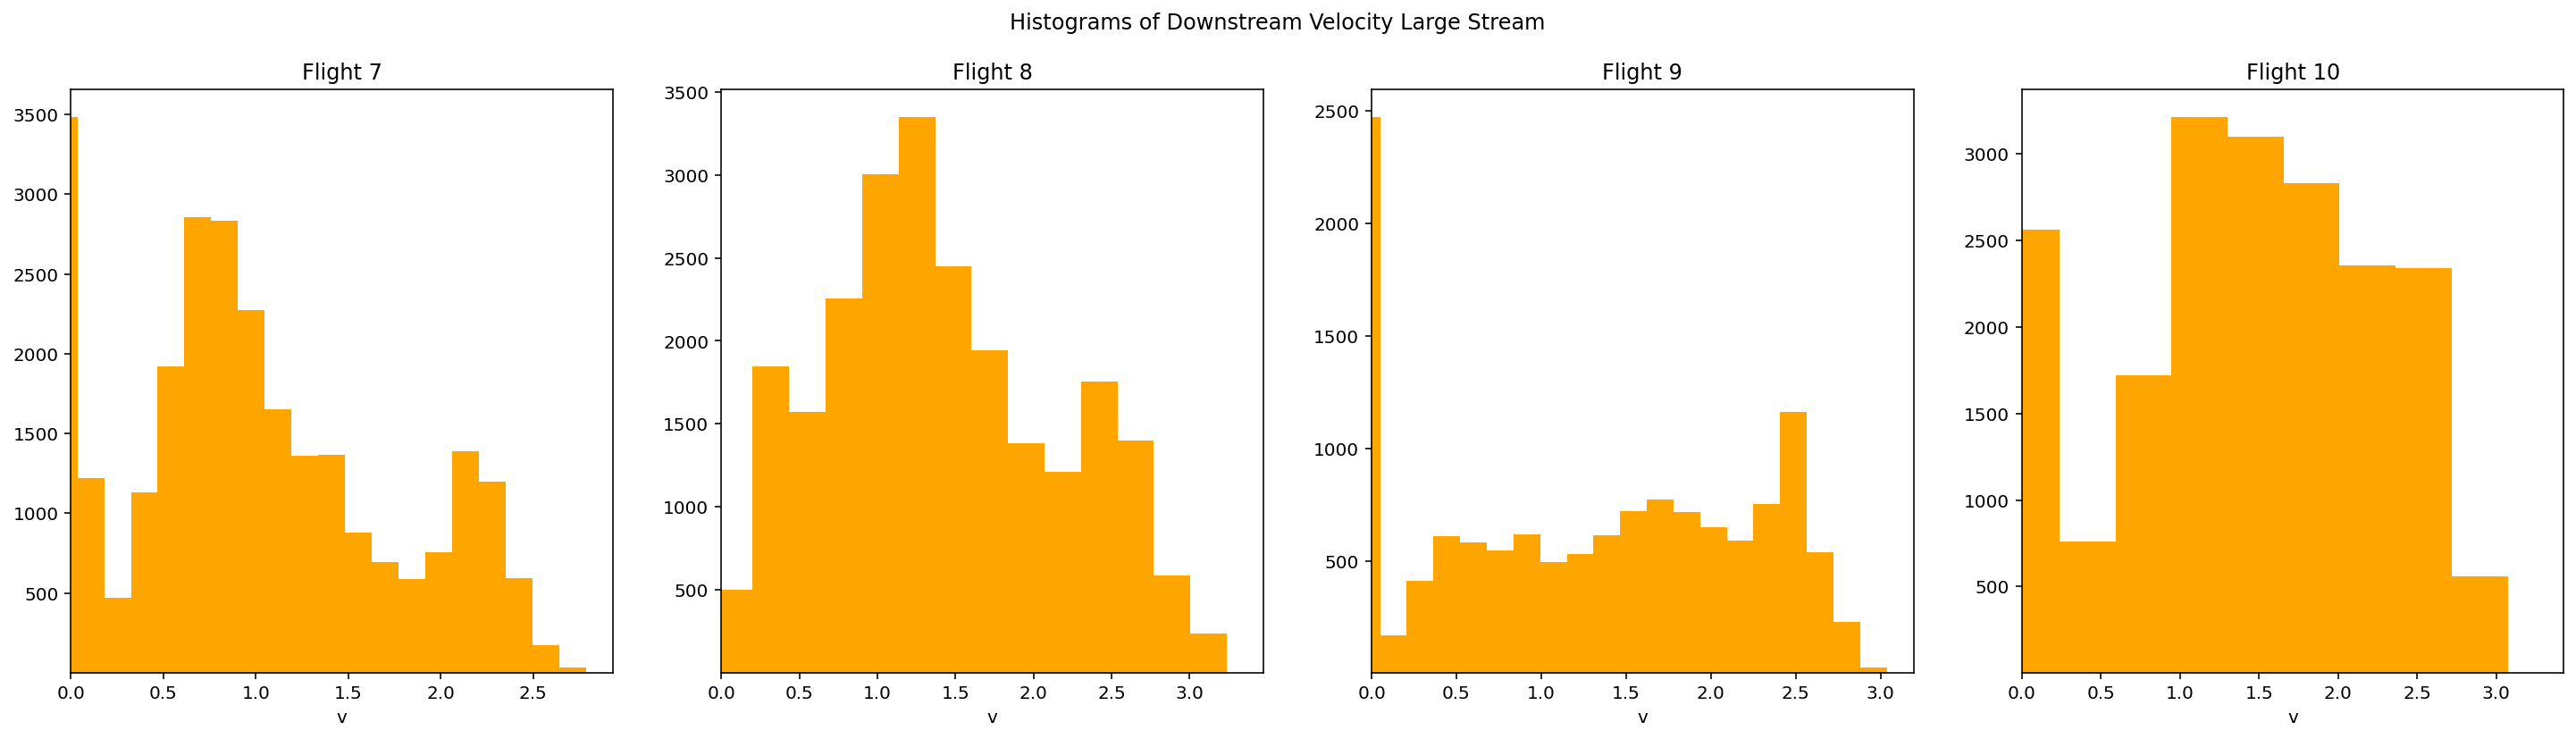

In [161]:
# Which flight recorded the fastest flowing lava
fig, axes = plt.subplots(figsize=(25, 6), ncols=4)
ax1, ax2, ax3, ax4 = axes

plt.suptitle("Histograms of Downstream Velocity Large Stream")

F07.v.sel(x=slice(290,320), y=slice(140,250)).plot.hist(xlim=0, ylim=2, ax=ax1, bins=20, color='orange'  )
ax1.set_title('Flight 7')

F08.v.sel(x=slice(290,315), y=slice(140,250)).plot.hist(xlim=0, ylim=3, ax=ax2, bins=20, color='orange' )
ax2.set_title('Flight 8')

F09.v.sel(x=slice(300,320), y= slice(160,250)).plot.hist(xlim=-0, ylim=3, ax=ax3, bins=20, color='orange'  )
ax3.set_title('Flight 9')

F10.v.sel(x=slice(320,350), y=slice(175,250)).plot.hist(xlim=0, ylim=3, ax=ax4, bins=20, color='orange'  )
ax4.set_title('Flight 10')



### Some Measurments

In [165]:
#Average velocity of the flow
bigflow =dfx.sel(x=slice(70,250))
print('Mean', bigflow.mean())
print('Standard Deviation', bigflow.std())
print('Max', bigflow.max() )
print('Min', bigflow.min())


Mean <xarray.Dataset>
Dimensions:  ()
Data variables:
    u        float64 -0.05095
    v        float64 1.257
    s        float64 1.274
Standard Deviation <xarray.Dataset>
Dimensions:  ()
Data variables:
    u        float64 0.1861
    v        float64 0.3314
    s        float64 0.3218
Max <xarray.Dataset>
Dimensions:  ()
Data variables:
    u        float64 1.179
    v        float64 2.006
    s        float64 2.008
Min <xarray.Dataset>
Dimensions:  ()
Data variables:
    u        float64 -0.8145
    v        float64 -0.1596
    s        float64 0.0005225


- The average flow for all the flights was about 1.25 m/s 


In [162]:
F09.sel(x=slice(320,350), y=slice(175,250)).mean()

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    Flight   <U3 'F09'
Data variables:
    u        float64 0.2861
    v        float64 0.2514
    s        float64 0.4151

### Metadata 
#### Site 6 Location
Latitude: 19.476251  
Longitude: -154.899143


#### Date 07/26/2018 
Start and end times HST

Flight 07: 12:53	13:08

Flight 08: 13:19	13:35

Flight 09: 13:48	14:05

Flight 10: 14:25	14:40

- Flights trimed to 2:00 min 

In [21]:
# Animation Widgets  - ipy widgets  https://ipywidgets.readthedocs.io/en/latest/
#  interactive GIF's